<a href="https://colab.research.google.com/github/PrzemyslawTrabuc/LoL_Predict/blob/main/LoL_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Inicjalizacja

In [ ]:
pip install lazypredict

  Using cached pandas-1.0.5-cp37-cp37m-manylinux1_x86_64.whl (10.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.


Czasami niektóre wykresy zwracały błąd związany z biblioteką pandas, dlatego jest reinstalowana do nowszej wersji  po instalacji LazyPredict, które korzysta ze starszej wersji.

In [ ]:
pip uninstall pandas 

Found existing installation: pandas 1.0.5
Uninstalling pandas-1.0.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.0.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.0.5


In [ ]:
pip install pandas 

  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires pandas==1.0.5, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
import lazypredict

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

In [ ]:
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving high_diamond_ranked_10min.csv to high_diamond_ranked_10min (4).csv


In [ ]:
import matplotlib.pyplot as plt

# 2. EDA

Macierz rozproszenia




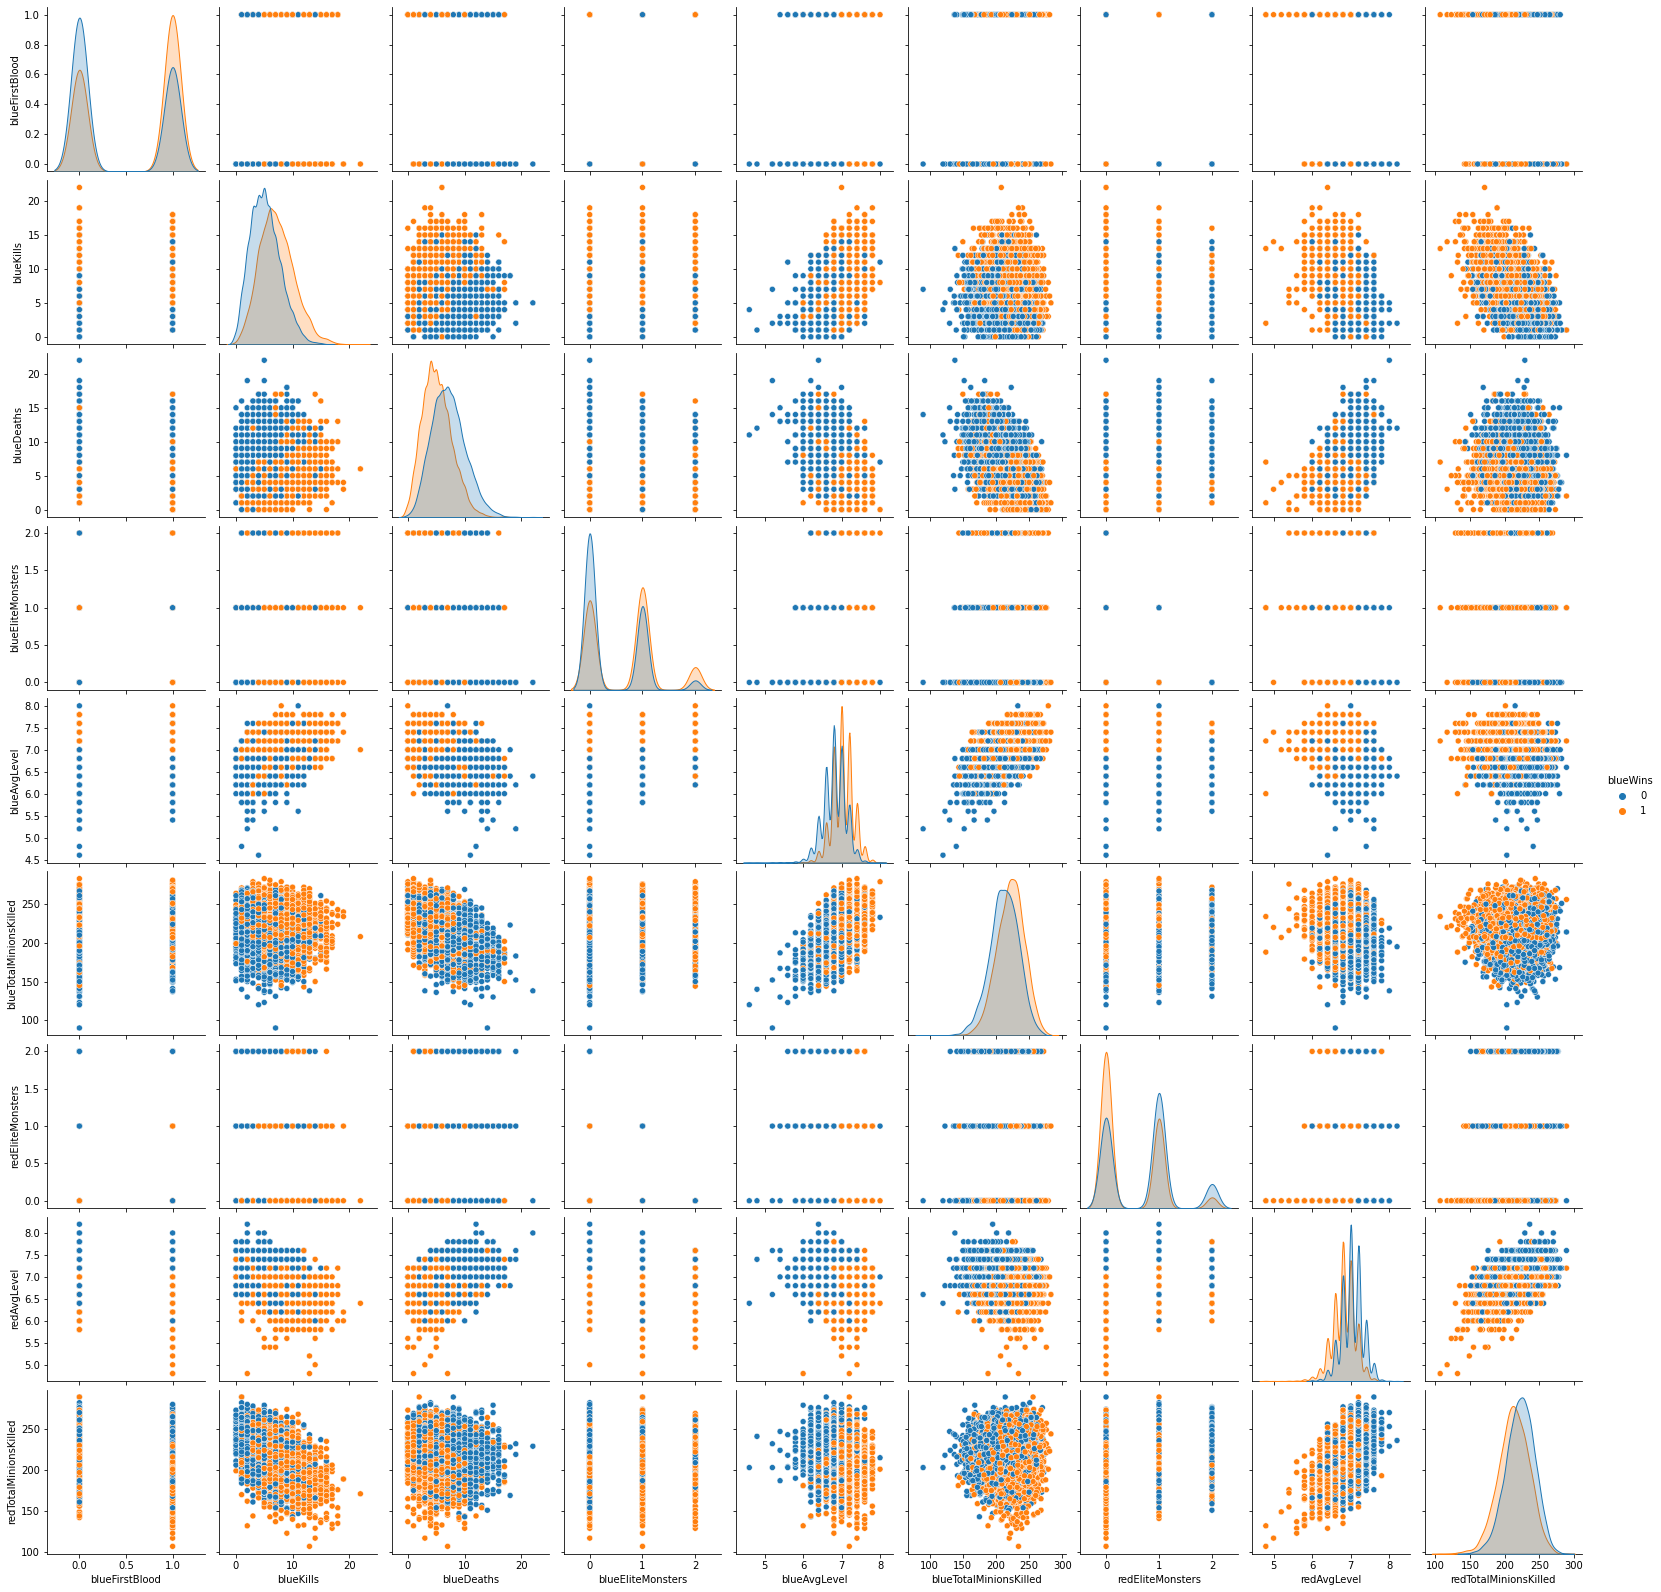

In [ ]:
sns.pairplot(X, hue='blueWins');

In [ ]:
auto = pd.read_csv("high_diamond_ranked_10min.csv", index_col=False) 
auto.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.60,17039,195,36,643,-8,19.50,1721.00,15,6,0,6,9,8,0,0,0,0,16567,6.80,17047,197,55,-643,8,19.70,1656.70
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.60,16265,174,43,-2908,-1173,17.40,1471.20,12,1,1,5,5,2,2,1,1,1,17620,6.80,17438,240,52,2908,1173,24.00,1762.00
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.40,16221,186,46,-1172,-1033,18.60,1611.30,15,3,1,11,7,14,0,0,0,0,17285,6.80,17254,203,28,1172,1033,20.30,1728.50
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.00,17954,201,55,-1321,-7,20.10,1515.70,15,2,1,5,4,10,0,0,0,0,16478,7.00,17961,235,47,1321,7,23.50,1647.80
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.00,18543,210,57,-1004,230,21.00,1640.00,17,2,1,6,6,7,1,1,0,0,17404,7.00,18313,225,67,1004,-230,22.50,1740.40


In [ ]:
auto.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00
mean,4500084044.85,0.50,22.29,2.82,0.50,6.18,6.14,6.65,0.55,0.36,0.19,0.05,16503.46,6.92,17928.11,216.70,50.51,14.41,-33.62,21.67,1650.35,22.37,2.72,0.50,6.14,6.18,6.66,0.57,0.41,0.16,0.04,16489.04,6.93,17961.73,217.35,51.31,-14.41,33.62,21.73,1648.90
std,27573278.49,0.50,18.02,2.17,0.50,3.01,2.93,4.06,0.63,0.48,0.39,0.24,1535.45,0.31,1200.52,21.86,9.90,2453.35,1920.37,2.19,153.54,18.46,2.14,0.50,2.93,3.01,4.06,0.63,0.49,0.37,0.22,1490.89,0.31,1198.58,21.91,10.03,2453.35,1920.37,2.19,149.09
min,4295358071.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10730.00,4.60,10098.00,90.00,0.00,-10830.00,-9333.00,9.00,1073.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11212.00,4.80,10465.00,107.00,4.00,-11467.00,-8348.00,10.70,1121.20
25%,4483301169.00,0.00,14.00,1.00,0.00,4.00,4.00,4.00,0.00,0.00,0.00,0.00,15415.50,6.80,17168.00,202.00,44.00,-1585.50,-1290.50,20.20,1541.55,14.00,1.00,0.00,4.00,4.00,4.00,0.00,0.00,0.00,0.00,15427.50,6.80,17209.50,203.00,44.00,-1596.00,-1212.00,20.30,1542.75
50%,4510920346.00,0.00,16.00,3.00,1.00,6.00,6.00,6.00,0.00,0.00,0.00,0.00,16398.00,7.00,17951.00,218.00,50.00,14.00,-28.00,21.80,1639.80,16.00,2.00,0.00,6.00,6.00,6.00,0.00,0.00,0.00,0.00,16378.00,7.00,17974.00,218.00,51.00,-14.00,28.00,21.80,1637.80
75%,4521733208.50,1.00,20.00,4.00,1.00,8.00,8.00,9.00,1.00,1.00,0.00,0.00,17459.00,7.20,18724.00,232.00,56.00,1596.00,1212.00,23.20,1745.90,20.00,4.00,1.00,8.00,8.00,9.00,1.00,1.00,0.00,0.00,17418.50,7.20,18764.50,233.00,57.00,1585.50,1290.50,23.30,1741.85
max,4527990640.00,1.00,250.00,27.00,1.00,22.00,22.00,29.00,2.00,1.00,1.00,4.00,23701.00,8.00,22224.00,283.00,92.00,11467.00,8348.00,28.30,2370.10,276.00,24.00,1.00,22.00,22.00,28.00,2.00,1.00,1.00,2.00,22732.00,8.20,22269.00,289.00,92.00,10830.00,9333.00,28.90,2273.20


In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
lol = auto


In [ ]:
df = auto

In [ ]:
# Sprawdzenie czy istnieją duplikaty
duplicated = lol.duplicated(subset=['gameId'])
print(duplicated.any() ==1)

False


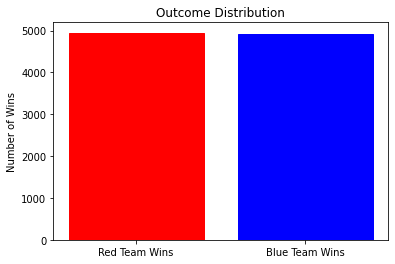

In [ ]:
# Wukres słupkowy w celu zwizualizowania dystrybucji danych
labels = ['Red Team Wins', 'Blue Team Wins']
red_wins = len(df.blueWins[df['blueWins']==0])
blue_wins = len(df.blueWins[df['blueWins']==1])
wins = (red_wins,blue_wins)
fig = plt.figure()
barPlot = plt.bar(labels,wins)
plt.ylabel('Number of Wins')
plt.title('Outcome Distribution')
barPlot[0].set_color('red')
barPlot[1].set_color('blue')
plt.show()



Kolumna zwycięstw jest rozłożona równomiernie.


# Histogram wybranych wartości

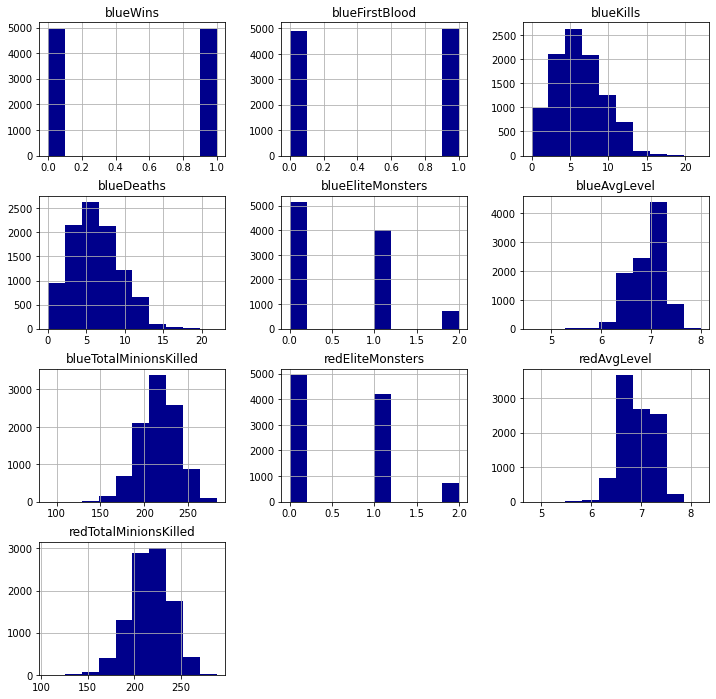

In [ ]:

X.hist(figsize=(12,12), color = 'darkblue')
plt.show()

# Heatmapy wybramych wartości

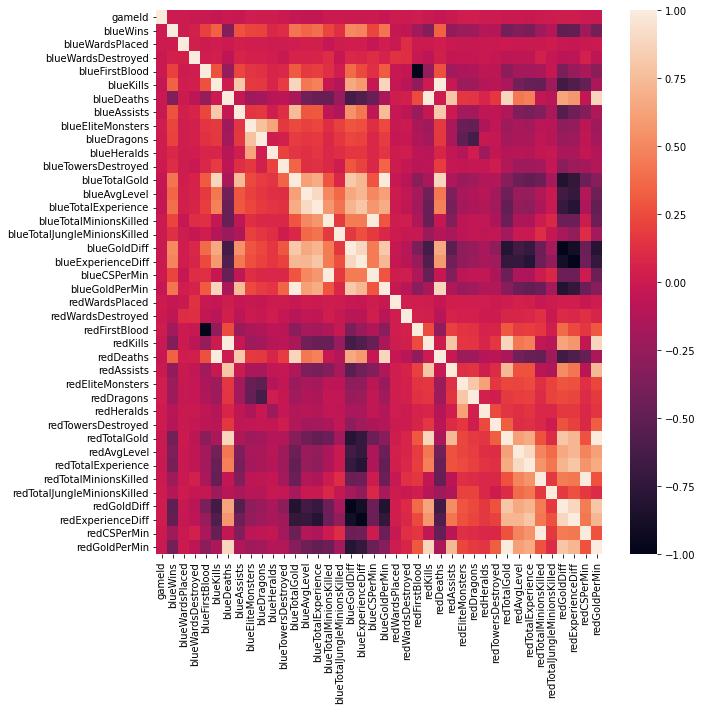

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(lol.corr())

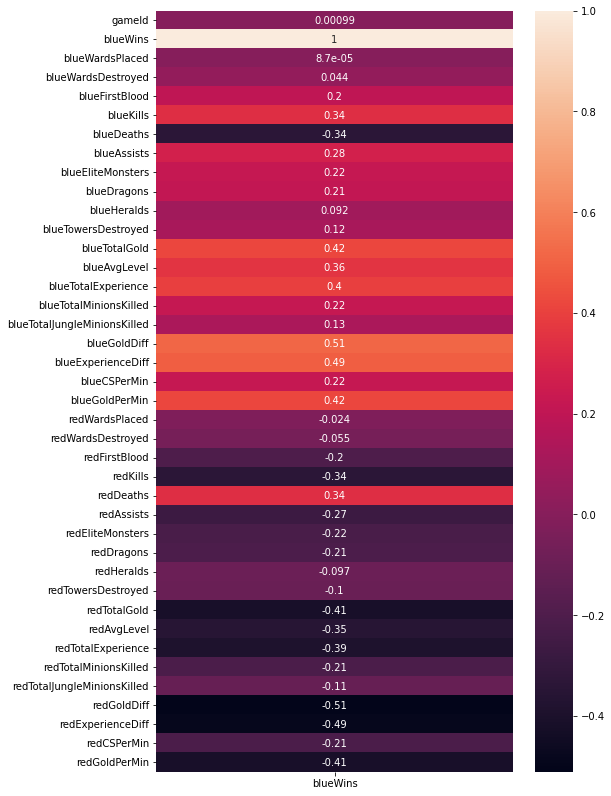

In [ ]:
fig = plt.figure(figsize=(8,14))
sns.heatmap(lol.corr()[['blueWins']],annot=True)



#Użycie histplot i countplot Seaborn, aby zwizualizować związek między każdą kolumną a wygraną / przegraną



In [ ]:
lol.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

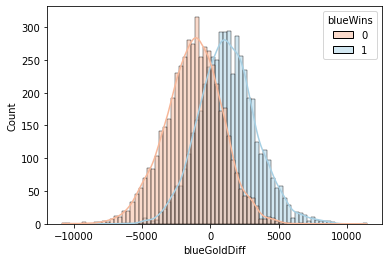

In [ ]:
sns.histplot(data=lol,x='blueGoldDiff',hue='blueWins',palette='RdBu',kde=True)

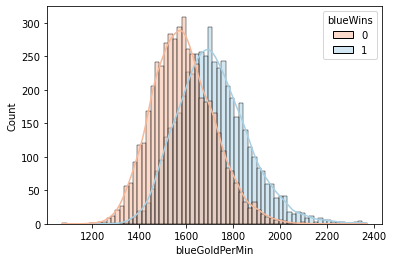

In [ ]:
sns.histplot(data=lol,x='blueGoldPerMin',hue='blueWins',palette='RdBu',kde=True)

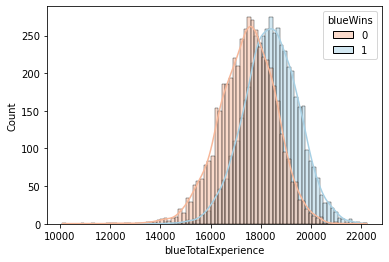

In [ ]:
sns.histplot(data=lol,x='blueTotalExperience',hue='blueWins',palette='RdBu',kde=True)

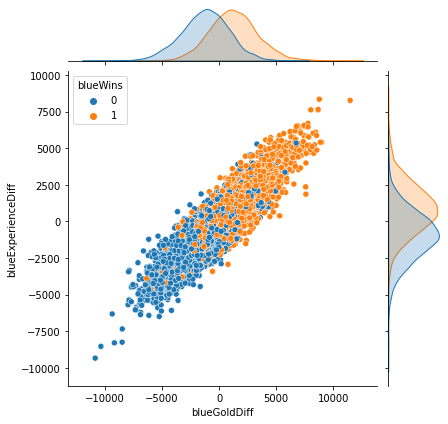

In [ ]:
sns.jointplot(data=lol,x='blueGoldDiff',y='blueExperienceDiff',hue='blueWins')


# 3. Przygotowanie danych

In [ ]:
df = auto

In [ ]:


#To avoid Multicollinearity drop some columns
df.drop(['gameId','redFirstBlood','redKills', 'redDeaths', 'redAssists',
       'redTotalGold','redTotalExperience','redGoldDiff','redExperienceDiff'],axis = 1 ,inplace =True)



In [ ]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redAvgLevel', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled',
       'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_num = df[['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redEliteMonsters',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']]
X_cat = df[['blueDragons','blueHeralds','redDragons','redHeralds','blueFirstBlood']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled,index=X_num.index,columns=X_num.columns)

X = pd.concat([X_scaled,X_cat],axis = 1)
y = df['blueWins']

In [ ]:
X.head()

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueDragons,blueHeralds,redDragons,redHeralds,blueFirstBlood
0,0.32,-0.38,0.94,-0.05,1.07,-0.88,-0.21,0.46,-1.04,-0.74,-0.99,-1.47,0.26,0.01,-0.99,0.46,-0.40,1.53,-0.91,-0.20,-0.41,-0.93,0.37,-0.93,0.05,0,0,0,0,1
1,-0.57,-0.84,-0.39,-0.39,-0.40,-0.88,-0.21,-1.17,-1.04,-1.39,-1.95,-0.76,-1.19,-0.59,-1.95,-1.17,-0.56,-0.81,2.28,4.41,-0.41,1.03,0.07,1.03,0.76,0,0,1,1,0
2,-0.40,-1.30,0.27,1.66,-0.65,0.72,-0.21,-0.25,-1.69,-1.42,-1.40,-0.46,-0.48,-0.52,-1.40,-0.25,-0.40,0.13,-0.91,-0.20,-0.41,-0.65,-2.32,-0.65,0.53,1,0,0,0,0
3,1.15,-0.84,-0.73,-0.39,-0.40,0.72,-0.21,-0.88,0.28,0.02,-0.72,0.45,-0.54,0.01,-0.72,-0.88,-0.40,-0.34,-0.91,-0.20,0.24,0.81,-0.43,0.81,-0.01,0,1,0,0,0
4,2.93,0.54,-0.06,-0.05,-0.16,-0.88,-0.21,-0.07,0.28,0.51,-0.31,0.66,-0.42,0.14,-0.31,-0.07,-0.29,-0.34,0.68,-0.20,0.24,0.35,1.56,0.35,0.61,0,0,1,0,0


# 4. Nauczanie i przewidywanie

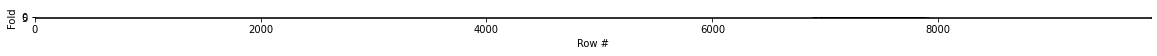

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(20, 20))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), X, y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10, random_state=42)

# 4.1. Lazypredict

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(xtrain, xtest, ytrain, ytest)
models

100%|██████████| 29/29 [00:39<00:00,  1.37s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.73,0.73,0.73,0.73,0.04
NearestCentroid,0.73,0.73,0.73,0.73,0.04
LGBMClassifier,0.72,0.73,0.73,0.72,0.39
RidgeClassifierCV,0.72,0.72,0.72,0.72,0.06
LogisticRegression,0.72,0.72,0.72,0.72,0.13
LinearDiscriminantAnalysis,0.72,0.72,0.72,0.72,0.12
RidgeClassifier,0.72,0.72,0.72,0.72,0.05
ExtraTreesClassifier,0.72,0.72,0.72,0.72,1.26
GaussianNB,0.72,0.72,0.72,0.72,0.03


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score                                                                                                                                                                                                                                     
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 4.2. LinearSVC

In [ ]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC()

LinearSVC()


LinearSVC()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

In [ ]:
model_lr = lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.7365725854471835


In [ ]:
cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %f" % cv_scores.mean())

CV average score: 0.730260


In [ ]:
pred = model_lr.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       718
           1       0.73      0.72      0.73       764

    accuracy                           0.72      1482
   macro avg       0.72      0.72      0.72      1482
weighted avg       0.72      0.72      0.72      1482



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#
dual=[True,False]
max_iter=[1000,500,1500,2000,5000,1800]
penalty=['l1','l2']
C=[0.5,0.8,1,1.2,1.5,2,2.5,3]
multi_class=['ovr', 'crammer_singer']
verbose=[0,1,2,3,4,5]

#
param_grid = dict(dual=dual,max_iter=max_iter,penalty=penalty,C=C,multi_class=multi_class,verbose=verbose)

random = RandomizedSearchCV(estimator=lsvc, param_distributions=param_grid, cv = 15, n_jobs=-1)

#start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

[LibLinear]Best: 0.731351 using {'verbose': 2, 'penalty': 'l1', 'multi_class': 'ovr', 'max_iter': 2000, 'dual': False, 'C': 1.2}


In [ ]:
lsvc = LinearSVC(verbose=2, penalty='l1', multi_class='ovr', max_iter=2000, dual=False, C=1.2)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

In [ ]:
model_lr = lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

[LibLinear]Score:  0.7322853400023818


In [ ]:
pred = model_lr.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       720
           1       0.75      0.74      0.74       762

    accuracy                           0.74      1482
   macro avg       0.74      0.74      0.74      1482
weighted avg       0.74      0.74      0.74      1482



# 4.3.LinearRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

In [ ]:
logreg = LogisticRegression()
model = logreg.fit(xtrain,ytrain)
score = logreg.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.7341907824222936


In [ ]:
cv_scores = cross_val_score(logreg, xtrain, ytrain, cv=10)
print("CV average score: %f" % cv_scores.mean())

CV average score: 0.735142


In [ ]:
pred = model.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       733
           1       0.73      0.72      0.72       749

    accuracy                           0.72      1482
   macro avg       0.72      0.72      0.72      1482
weighted avg       0.72      0.72      0.72      1482



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#
dual=[True,False]
max_iter=[1000,500,1500,2000,5000,1800,6000,7000]
penalty=['none','l2']
C=[0.5,0.8,1,1.2,1.5,2,2.5,3]
multi_class=['ovr', 'crammer_singer']
verbose=[0,1,2,3,4,5]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

#
param_grid = dict(dual=dual,max_iter=max_iter,penalty=penalty,C=C,multi_class=multi_class,verbose=verbose)

random = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv = 15, n_jobs=-1)

#start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.730845 using {'verbose': 1, 'penalty': 'none', 'multi_class': 'ovr', 'max_iter': 1500, 'dual': False, 'C': 0.8}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

In [ ]:
logreg = LogisticRegression(verbose= 1, penalty= 'none', multi_class= 'ovr', max_iter= 1500, dual= False, C= 0.8)
model = logreg.fit(xtrain,ytrain)
score = logreg.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.7340716922710492


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [ ]:
pred = model.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       733
           1       0.72      0.72      0.72       749

    accuracy                           0.72      1482
   macro avg       0.72      0.72      0.72      1482
weighted avg       0.72      0.72      0.72      1482



# 5. Wnioski

Celem zadania było przewidzenie zwycięstw drużyny niebieskiej na podstawie zestawu danych z gry komputerowej Leaggue of Legends. W ćwiczeniu wykorzsytano biblioteke LazyPredict w celu znalezienia najlepszego narzędzia do realizacji dalszej części zadania, do której wybrano modele LinearSVC i LogicalRegression. Następnie należało dostroić je, w tym relu wykorzystany został RandomSearch. Wyniki wszystkich operacji można znaleźć w rozdziale 4. W przypadku LinearSVC udało się uzyskać niewielką poprawę wyniku, w przypadku LinearRegression to nie nastąpiło.